In [1]:
# **********************************************************************************************************
# Author: Andi Sama 
# Purpose: Demonstrate "Hello World" in Quantum Computer
#   - Through Quantum Entanglement in 2 Qubits configuration
#   - Using Simulated Quantum Computer (QASM Quantum Simulator) & real Quantum Computer (IBM Q on IBM Cloud)
# Organization: Sinergi Wahana Gemilang
# Creation Date: May 7, 2020
# Changes history:
#   - May 8: finalized
# References:
#   - IBM Think2020 virtual event, May 5-6 2020
#   - IBM Quantum Experience on IBM Cloud
#   - Qiskit.org Youtube Channel
#   - Qiskit.org Textbook
#
# See article in medium.com/@andisama (June 2020)
# **********************************************************************************************************

In [2]:
# import necessary library
# install it with "pip install qiskit"
import os, platform, sys, time
from datetime import date
print('OS name:', os.name, ', system:', platform.system(), ', release:', platform.release())
print("Anaconda version:")
!conda list anaconda
print("Python version:", sys.version)
print("Python version info: ", sys.version_info)
# the following can be selected or just 'from qiskit import *''
from qiskit import qiskit, QuantumRegister, ClassicalRegister, QuantumCircuit, IBMQ, execute, Aer
%matplotlib inline
print("IBM Qiskit:", qiskit.__qiskit_version__)

OS name: nt , system: Windows , release: 10
Anaconda version:
# packages in environment at C:\Users\andis\anaconda3:
#
# Name                    Version                   Build  Channel
Python version:_anaconda_depends         2019.03                  py37_0  
anaconda                  custom                   py37_1  
anaconda-client           1.7.2                    py37_0  
 3.7.7 (default, Mar 23 2020, 23:19:08) [MSC v.1916 64 bit (AMD64)]
Python version info:  sys.version_info(major=3, minor=7, micro=7, releaselevel='final', serial=0)
anaconda-navigator        1.9.12                   py37_0  
anaconda-project          0.8.4                      py_0  
IBM Qiskit: {'qiskit-terra': '0.14.1', 'qiskit-aer': '0.5.1', 'qiskit-ignis': '0.3.0', 'qiskit-ibmq-provider': '0.7.0', 'qiskit-aqua': '0.7.0', 'qiskit': '0.19.1'}


# A. Build the Quantum Circuit

In [3]:
# just do this once - save your token to your computer to use later (IBMQ.load_account()
# get the token from your account in https://quantum-computing.ibm.com/
#  MyAccount -> Qiskit in local environment -> Copy Token
# IBMQ.save_account('your token here....') 

In [4]:
# define registers and create quantum circuit
# we can also define quantum circuit directly as follows:
#  circuit = QuantumCircuit(2,2) # quantum circuit with 2 quantum registers and 2 classical registers
qr = QuantumRegister(2) # quantum register, 2 qubits
cr = ClassicalRegister(2) # classical register, 2 classical bits
circuit = QuantumCircuit(qr, cr)

In [5]:
print("Quantum Register: %s, Classical Register: %s" %(qr, cr))
print("Quantum Registers:", qr[0], qr[1])
print("Classical Registers:", cr[0], cr[1])

Quantum Register: QuantumRegister(2, 'q0'), Classical Register: ClassicalRegister(2, 'c0')
Quantum Registers: Qubit(QuantumRegister(2, 'q0'), 0) Qubit(QuantumRegister(2, 'q0'), 1)
Classical Registers: Clbit(ClassicalRegister(2, 'c0'), 0) Clbit(ClassicalRegister(2, 'c0'), 1)


In [6]:
# draw the created quantum circuit
circuit.draw()

q0_0: 
      
q0_1: 
      
c0_0: 
      
c0_1:

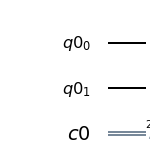

In [7]:
# draw the created quantum circuit, nicer output
circuit.draw(output='mpl')

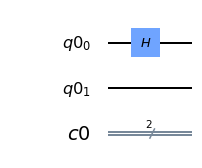

In [8]:
# Demonstrate Quantum Entanglement, 2 Qubits
# - apply hadamard gate on qubit[0]
# - apply controlled-x gate with qubit[0] as control qubit to qubit[1] as controlled qubit
# - measure both qubit[0] and qubit[1] and store the result to classical bits 0 and 1

# first, apply hadamard on qubit[0]
circuit.h(qr[0])
circuit.draw(output='mpl')

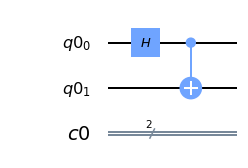

In [9]:
# then apply controlled-x gate with qubit[0] as control qubit to qubit[1] as controlled qubit
circuit.cx(qr[0], qr[1])
circuit.draw(output='mpl')

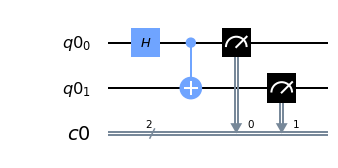

In [10]:
# finally, measure both qubit[0] and qubit[1] and store the result to classical register 0 and 1
circuit.measure(qr, cr)
circuit.draw(output='mpl')

# B. Run the Quantum Circuit

## B.1. Run the Quantum Circuit, "Simulated" in our computer

In [11]:
# Run the quantum circuit, by using backend simulator in our computer
from qiskit.tools.visualization import plot_histogram
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator).result()
print(result)

Result(backend_name='qasm_simulator', backend_version='0.5.1', date=datetime.datetime(2020, 5, 8, 21, 10, 31, 256297), header=Obj(backend_name='qasm_simulator', backend_version='0.5.1'), job_id='58b824a6-0451-45b5-92e3-73191e196965', metadata={'max_memory_mb': 8119, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.0051069}, qobj_id='bf729de3-b35b-43e8-9ea4-4029539cb057', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=520, 0x3=504)), header=Obj(clbit_labels=[['c0', 0], ['c0', 1]], creg_sizes=[['c0', 2]], memory_slots=2, n_qubits=2, name='circuit8', qreg_sizes=[['q0', 2]], qubit_labels=[['q0', 0], ['q0', 1]]), meas_level=<MeasLevel.CLASSIFIED: 2>, metadata={'measure_sampling': True, 'method': 'stabilizer', 'parallel_shots': 1, 'parallel_state_update': 8}, seed_simulator=3427093410, shots=1024, status='DONE', success=True, time_taken=0.0037416)], status='COMPLETED', success=True, time_taken=0.005984306335449219)


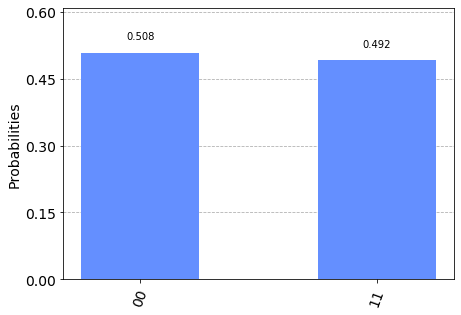

In [12]:
plot_histogram(result.get_counts(circuit))

In [13]:
# Note:
#  - the result above shows about 50%:50% probabilities for 00 and 11
#  - as the expected result is 50%:50%, this small error occurred because we run a limited shots (experiment)

## B.2. Run our Quantum Circuit on The "Real IBMQ Quantum Computer"

In [14]:
# Run our quantum circuit on The "Real IBMQ Quantum Computer" by submitting a job containing our defined quantum circuit
from qiskit.tools.monitor import job_monitor

In [15]:
# load saved credential to access IBM real quantum computer
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [16]:
# define the backend IBM real quantum computer to use
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_16_melbourne')

In [17]:
# submit & monitor our quantum circuit to IBM backend real quantum computer
job = execute(circuit, backend = qcomp, shots = 1024)
job_monitor(job)

Job Status: job has successfully run


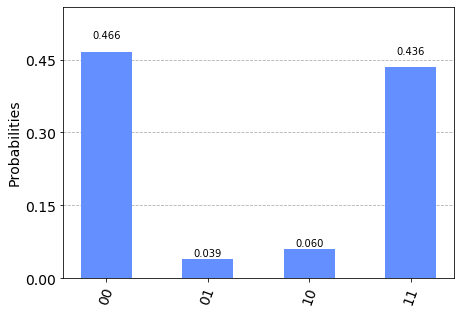

In [18]:
# inspect the result
result = job.result()
plot_histogram(result.get_counts(circuit))

In [19]:
# note:
#  - we see probabilities applied (majority) in 00 and 11 states 
#  - we also see that there are small probabilities that 01 and 10 states are occurring
#    due to the nature of error in executing our quantum circuit in the real quantum computer